<a href="https://colab.research.google.com/github/ritvikravi/ravbhar/blob/main/NSSEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import os
import sklearn as sk

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold


# Fetching The Main CSV File


In [ ]:
# File is uploaded in my Google Drive and its ID is This
DataSetFileID = "1c7GHuR4ZnN6DqPvzudIJK694IBys_3WW"
# Actual URL To that File
DataSetURL = f'https://drive.google.com/uc?id={DataSetFileID}'
# Panda's Reads the URL From Drive Directly
DataSet = pd.read_csv(DataSetURL)

# 1.1 Inspect the data type and extract basic statistics

## 1.1.1 Range, Mean, Median, and Standard Deviation of the dataset.

In [1]:
# Creating a directory for storing different files used to store data
if not os.path.exists("./Question1/"):
  os.mkdir("./Question1/")

# Writes the median to Median.csv file
DataSet.median(numeric_only=True).dropna().to_csv("Question1/Median.csv")

# Writes the standard deviation to StandardDeviation.csv file
DataSet.std(numeric_only=True).dropna().to_csv("Question1/StandardDeviation.csv")

# Writes the mean to Mean.csv file
DataSet.mean(numeric_only=True).dropna().to_csv("Question1/Mean.csv")

# Dictionary for storing range values of respective columns
RangeDataSet = {}

# Logic for finding range and writing it to above given dictionary
for Columns in DataSet.select_dtypes(include=np.number).columns.tolist():
  RangeDataSet[Columns] = DataSet[Columns].max() - DataSet[Columns].min()

# Converting the above dictionary into a panda's dataframe for visualizing as CSV file
RangeDataFrame = pd.DataFrame.from_dict(RangeDataSet, orient="index")

# Writes the range to Range.csv file
RangeDataFrame.dropna().to_csv("Question1/Range.csv")

# Using the Scikit-Learn MinMax Scaler for Normalizing
Normalizer = sk.preprocessing.MinMaxScaler()

# Converting into Pandas DataFrame
NormalizedDataFrame = pd.DataFrame(Normalizer.fit_transform(DataSet[DataSet.select_dtypes(include = np.number).columns.tolist()]), columns = DataSet.select_dtypes(include = np.number).columns.tolist())

# Exporting to CSV File
NormalizedDataFrame.to_csv("Normalized_Exoplanet_Catalog.csv")

NameError: name 'os' is not defined

## 1.2.1 Using the Seaborn module, plot a heatmap to explore the various planetary detection methods used over the years.

In [ ]:
# Using matplotlib to set the Figure Size (In This Case Image Size)
plt.figure(figsize=(60,30))

sns.set_context(font_scale = 6.0)

# Tick values for SideMap
TickArray = []

# TickArray has 0, 100, 200 ...... 1400
for i in range(0,1400, 100):
  TickArray.append(i)


# CNT feature is added to DataSet and values for each row is set has 1. We need to sum up the number of planets detected by a method in each year
# so we need a sum of the number of planets
# to sum up we assigned each planet's count as 1 and then add accordingly
DataSet['CNT'] = 1

# Trimming the dataset such that only these three columns are there
TrimmedDataSet = DataSet[['P_YEAR', 'P_DETECTION', 'CNT']]

# Customization for sidemap of heatmap
CBARCustomizationDict = {"shrink" :  1, "ticks" : TickArray}

# A pivot table is created and stored in the PivotedDataSet
# Pivot table accepts the data set and reorganizes selected columns and rows of the data accepting desired columns,rows,values and filters
# all null values are filled with zero
PivotedDataSet = pd.pivot_table(TrimmedDataSet, index='P_DETECTION', columns='P_YEAR', values='CNT', aggfunc="sum").fillna(0)

# Sets the plot title
plt.title("Various Detection Methods Used Over Years")

# Plots the actual heatmap.
# cbar_kws is the kwarg for Customizing sidemap
# cmap is kwarg for Colour Map
# annot is kwarg for setting values on the each square in heatmap

sns.heatmap(PivotedDataSet, cmap="rocket_r", cbar_kws= CBARCustomizationDict,annot=True)

plt.title("Detection Methods Heat Map\n\n", fontsize = 40)

# Y-Axis Label
plt.ylabel("Planetary Detection Methods", fontsize = 40)

# X-Axis Label
plt.xlabel("Years", fontsize = 80)

# Saving the plot to DetectionMethodsHeatMap.png
plt.savefig("DetectionMethodsHeatMap.pdf")

## 1.2.1 What do you infer from the above heatmap?
1. **Transit method** helps detect maximum number of planets
2.Maximum number of planets (nearly **1400**) were detected in **2016** using the **Transition Method**
3. Transit method mostly came into picture in year **2010**
4. Second most used method is **Radial Velocity** method

## 1.3 Identify the planetary detection methods that have identified the most:
 i)  Uninhabitable planets (0) : **Transit**\
ii) Conservatively habitable planets (1) : **Radial Velocity**\
iii) Optimistically habitable planets (2) : **Transit**

In [ ]:
# Trimming the dataset such that only these three columns are there
TrimmedDataSet2 = DataSet[['P_HABITABLE', 'P_DETECTION', 'CNT']]

# Values used for sidemap
TickArray = []

# TickArray holds the value 0, 250, 500 ..... 3000
for i in range(0,3001, 250):
  TickArray.append(i)

# Sidemap customization
CBARCustomizationDict = {"shrink" :  1, "ticks" : TickArray}

PivotedDataSet2 = pd.pivot_table(TrimmedDataSet2,index='P_DETECTION', columns='P_HABITABLE', values='CNT', aggfunc="sum").fillna(0)

# Plots the actual heatmap
# cmap kwarg is the colour map (palette used)
# cbar_kws  kwarg is the customization of sidemap
# annot kwarg is used to set values on each square used in heatmap
sns.heatmap(PivotedDataSet2, cmap="rocket_r", cbar_kws = CBARCustomizationDict, annot=True)

# Y-Axis Label
plt.ylabel("Planetary Detection Methods")

# X-Axis Label
plt.xlabel("Habitability")

plt.savefig("PlanetaryDetectionMethods_VS_Habitability_HeatMap.pdf")

# Writes the PivotedDataSet2 into Habitability.csv file
PivotedDataSet2.to_csv("Habitability.csv")

## 1.4 Determine the Interquartile Range and the Skewness of the Dataset

In [ ]:
# Gets the skewness value of each row and writes it as CSV file to Skewness.csv file
DataSet.skew(numeric_only=True).dropna().to_csv("Question1/Skewness.csv")

# Inter Quartile Range = Third Quartile - First Quartile
IQRDataSet = DataSet.quantile(0.75, numeric_only=True) - DataSet.quantile(0.25, numeric_only=True)

# Writes the IQRDatSet to IQR.csv file
IQRDataSet.dropna().to_csv("Question1/IQR.csv")

## 1.5 How would you tackle the classification bias (class imbalance) of the Dataset?


Often when we have a skewed data distribution, we face issues regarding **lower recognition rates** for minority classes. This makes the algorithms to favor or be biased towards the majority class leading to **class imbalance**

To tackle this biasness, we have two techniques as follows:

1. **Oversampling**:
  * In this approach we sythesize newer examples drom the minority class. The technique used is **SMOTE** (Synthetic Minority Oversampling Technique).
    * SMOTE randomly selects a minority class example and find it's "n" nearest minority class neighbours at random. And a synthetic example is generated at a point in the line connecting the two examples.
    * When created samples from SMOTE are added to our dataset , then the class distributions are balanced and helps the classifier to recognise the minority class better with lesser overfitting to the majority class.

2. **Undersampling**:
  * Here, as the name suggests , we decrease the number of samples from the majority class, enough to match the number of samples from the minority class.
  * Method followed to achieve Undersampling is :
      
  *  *Random sampler* : We select randomly a desired number of samples
       from majority class and remove them.

## 1.6 Report the ratio of the Number of Iron atoms to the Number of Hydrogen atoms for the exoplanets in the dataset by creating a separate feature titled ‘Fe to H Ratio’


In [ ]:
# SUN_X - mass fraction of hydrogen in sun
# SUN_Z - metallicity of sun
# FE_M - atomic mass of iron
# HY_M - atomic mass of hydrogen
# SUN_N_BY_H - ratio of number of iron atoms to number of hydrogen atoms of sun
SUN_X = 0.7381
SUN_Z = 0.0134
FE_M = 55.845
HY_M = 1.00784

StarMetallicity = DataSet['S_METALLICITY']

StarMetallicity = 10**(StarMetallicity)

SUN_N_BY_H = (SUN_Z / SUN_X) * (FE_M / HY_M)

StarMetallicity = StarMetallicity * SUN_N_BY_H

DataSet['P_FE_TO_H_RATIO'] = StarMetallicity

# Writes the Columns P_NAME and P_FE_TO_H_RATIO to FE_TO_H_RATIO.csv file
DataSet[["P_NAME", "P_FE_TO_H_RATIO"]].to_csv("Question1/FE_TO_H_RATIO.csv")

# 2. Interpretation And Calculation Of Physical Parameters

## 2.1 Calculating Escape Velocities






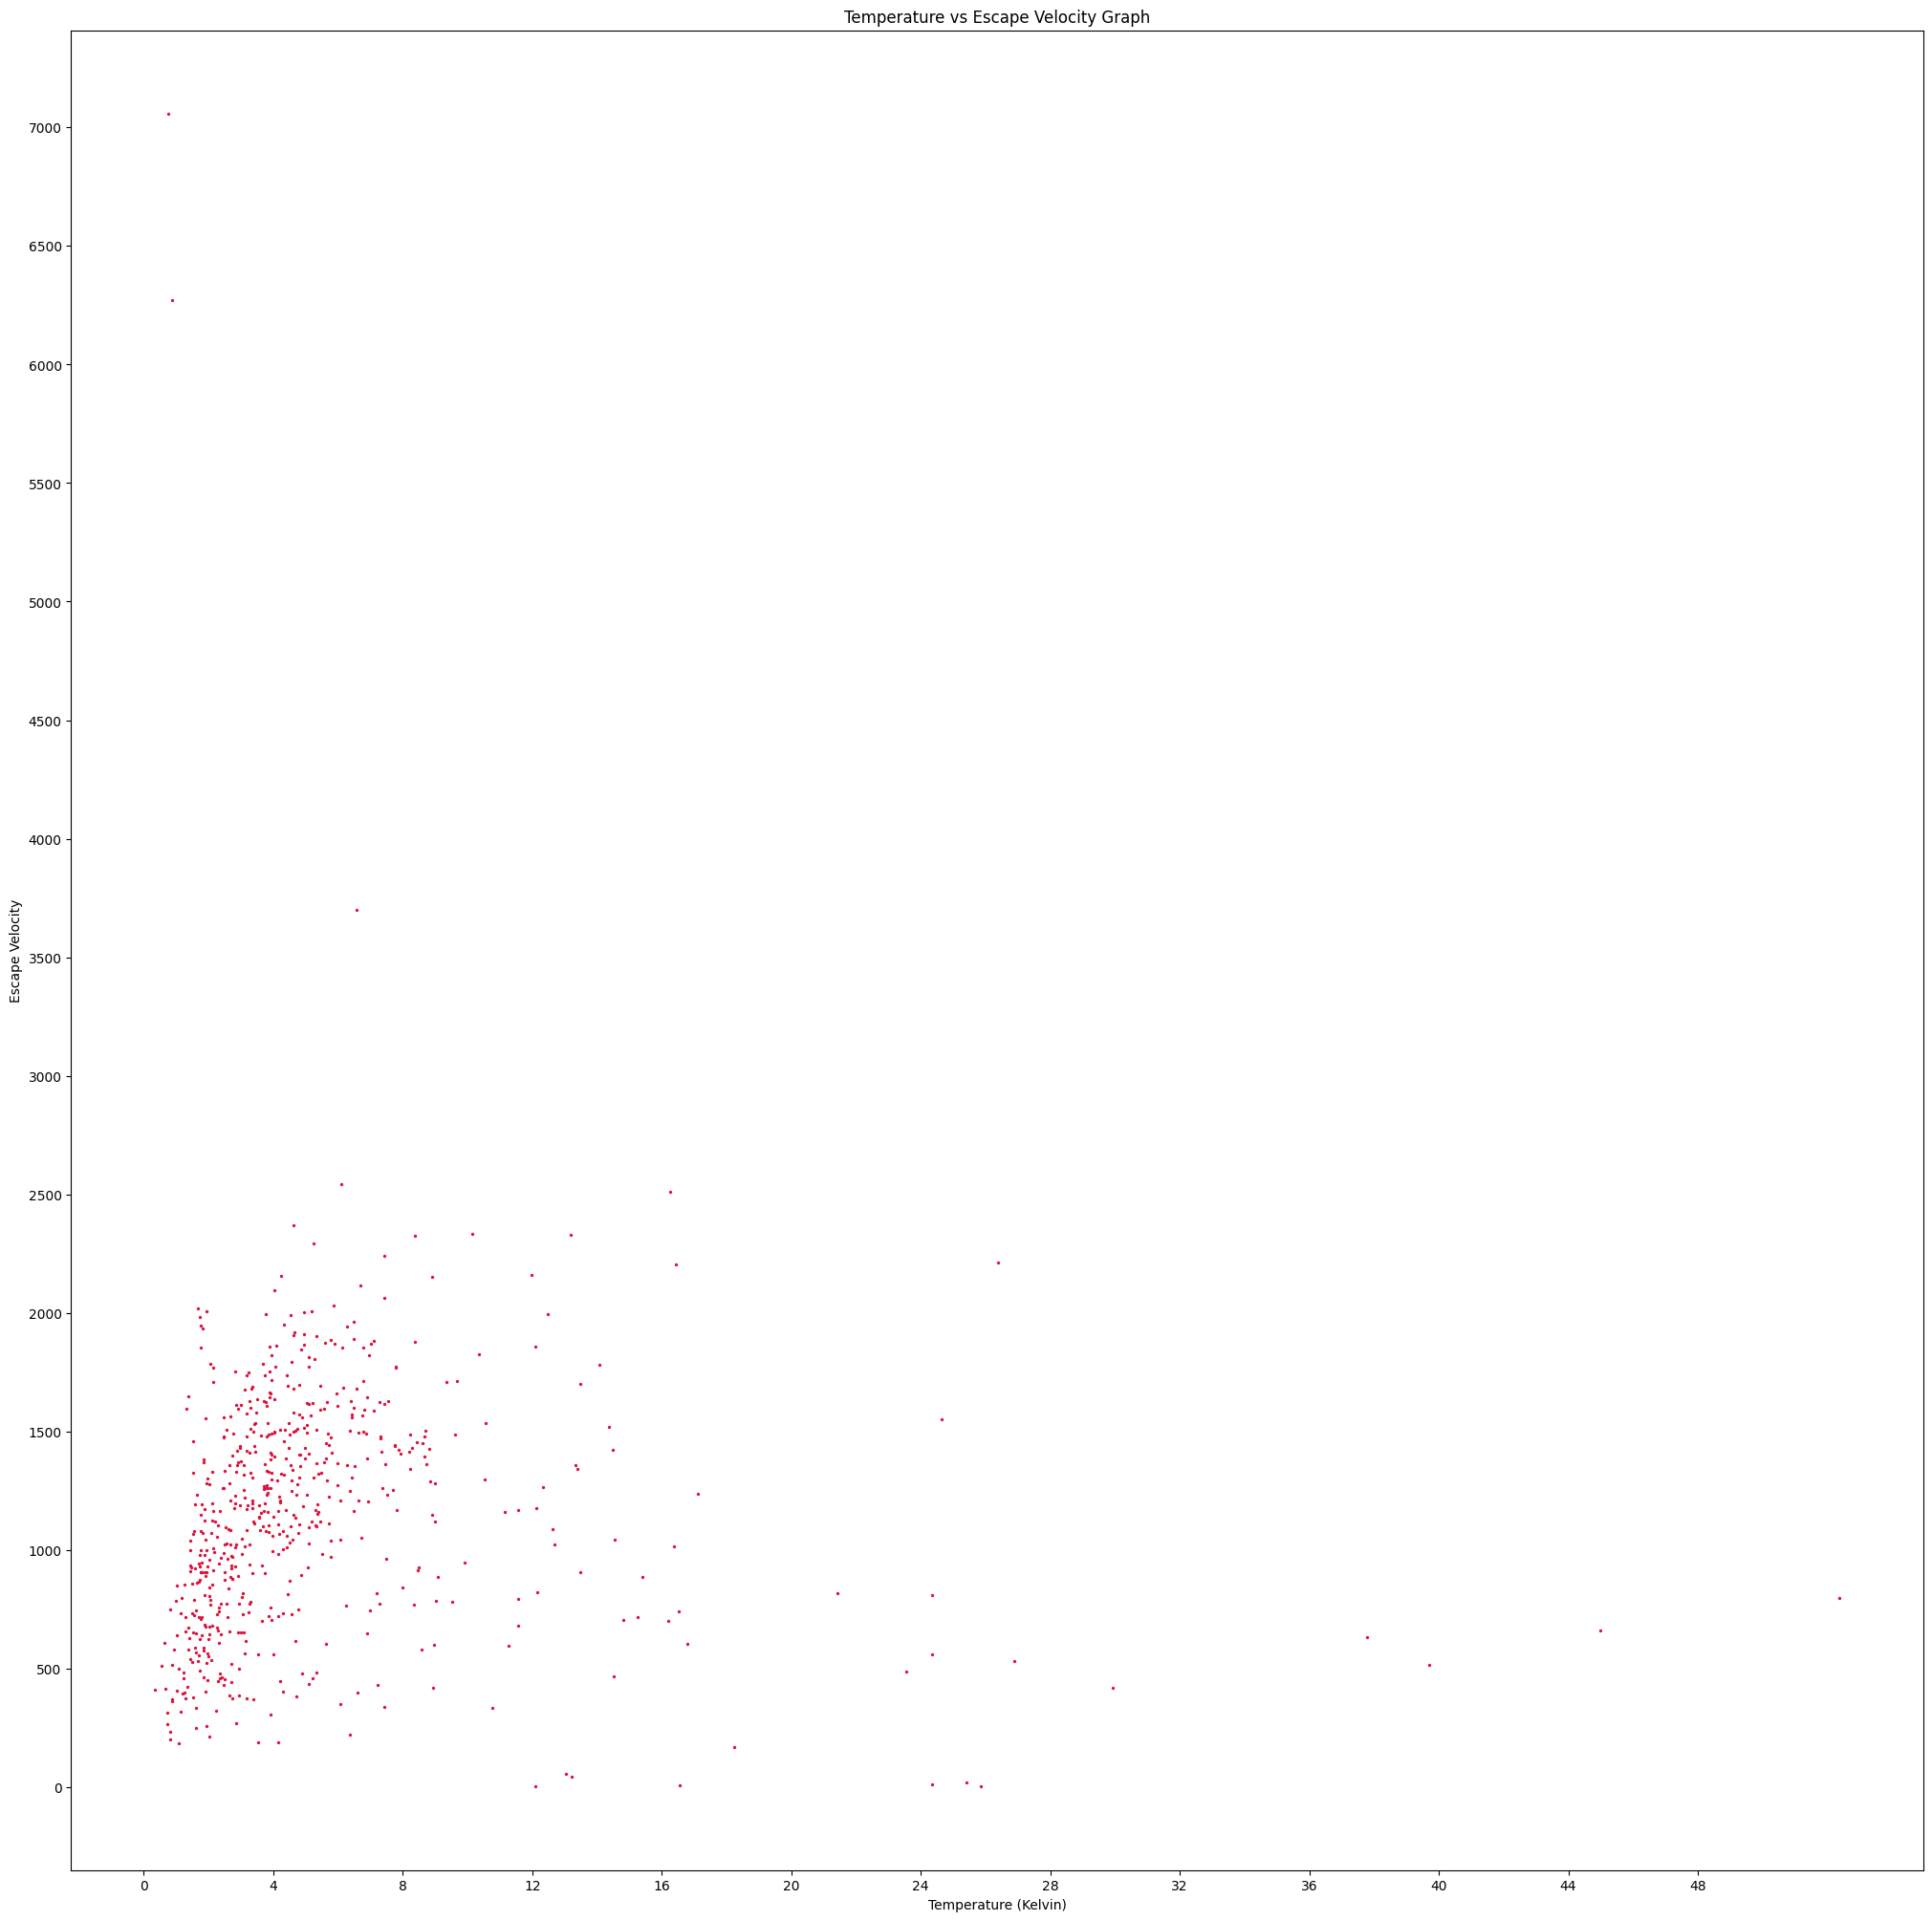

In [ ]:
# Creating a directory to store the files used in Question2
if not os.path.exists("./Question2/"):
  os.mkdir("./Question2/")

# Dictionary to store the Escape Velocities in the format (P_NAME)(str) : (EscapeVelocity)(float)
EscapeVelocityDict = {}

# Newtons Gravitational Constant
G = 6.67430 * (10 ** (-11))

# Logic for finding Escape Velocity iteratively
# DataSet.shape[0] gives the number of rows in DataSet
for i in range(0, DataSet.shape[0]):
  # If Either P_MASS or P_RADIUS is NAN, Then we do not calculate Escape Velocity
  if not ((math.isnan(DataSet["P_MASS"][i])) or (math.isnan(DataSet["P_RADIUS"][i]))):

    # Escape Velocity = sqrt(2GM/r)
    EscapeVelocityDict[DataSet["P_NAME"][i]] = ((2 * G * DataSet["P_MASS"][i])/DataSet["P_RADIUS"][i]) ** (1/2)

EscapeVelocityValues = []
TemperatureValues  = []

for i in range(0, DataSet.shape[0]):

  if not (math.isnan(DataSet["P_ESCAPE"][i]) and math.isnan(DataSet["P_TEMP_EQUIL"][i])):

    EscapeVelocityValues.append(DataSet["P_ESCAPE"][i])
    TemperatureValues.append(DataSet["P_TEMP_EQUIL"][i])

plt.figure(figsize = (25,25))

plt.scatter(EscapeVelocityValues, TemperatureValues, color = "crimson", s = 2)

plt.title("Temperature vs Escape Velocity Graph")

plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Escape Velocity")

plt.xticks(np.arange(0,49,4))
plt.yticks(np.arange(0,7001,500))

plt.savefig("EscapeVelocity_VS_Temperature_Plot.pdf")

## 2.2 Plotting Star Ages against Star Metallicities

In [ ]:
# Styling the plot
sns.set_context('paper', font_scale=4.0)

DataSet['CNT'] = 1

# Extract required data fields
star_data = DataSet[['S_AGE', 'S_METALLICITY', 'CNT']]

# Sort metallicity values
star_data.sort_values(by=['S_METALLICITY'])

pivoted_star_data = pd.pivot_table(star_data, index = 'S_AGE', columns = 'S_METALLICITY', values = 'CNT')

# Adjusting plot attributes
plt.figure(figsize = (50, 40))
sns.heatmap(pivoted_star_data, vmin = -5, vmax = 1, cmap = 'Blues')

# Labelling plot axes
plt.xlabel("Star Metallicity")
plt.ylabel("Star Age")

# Plot title
plt.title("Star Ages vs Star Metallicity\n\n")

# Exports as pdf
plt.savefig("StarAges_VS_StarMetallicity_Plot.pdf")

plt.close()

## 2.3

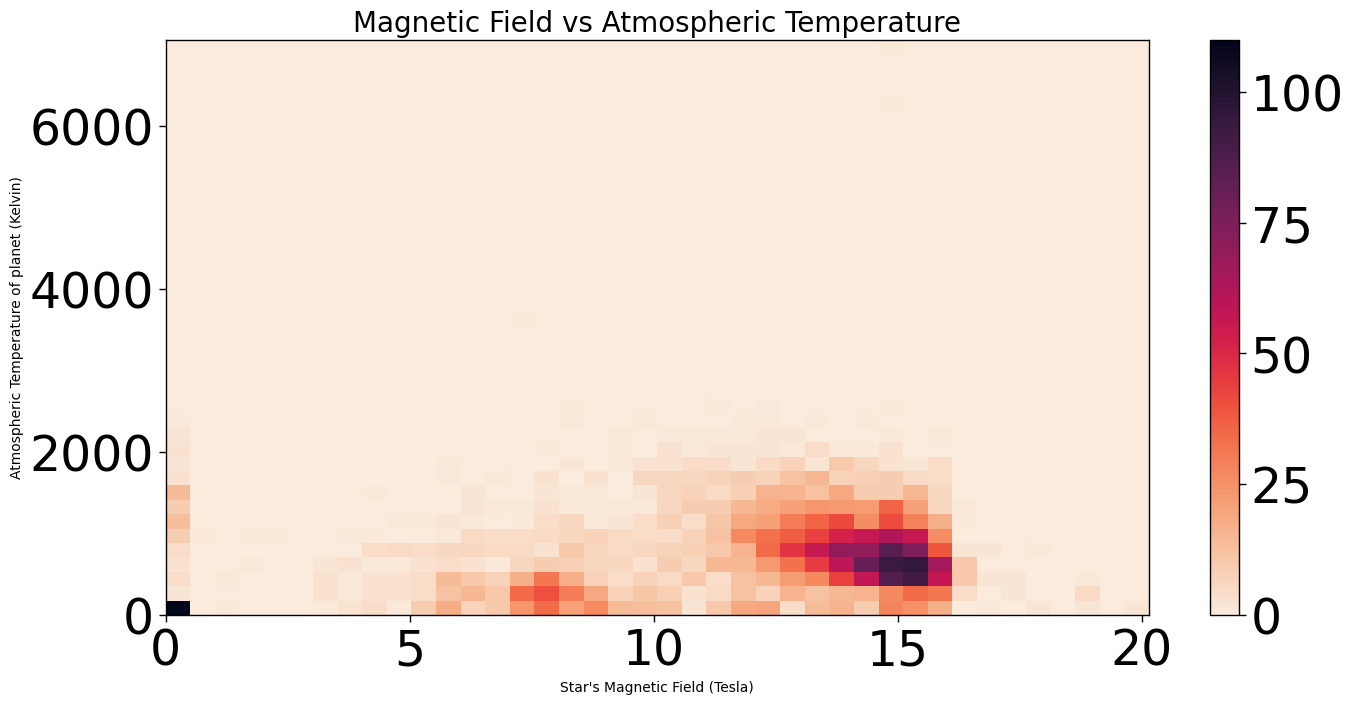

In [ ]:
plt.figure(figsize = (15,8), tight_layout = True)

# Plots a 2D Histogram
plt.hist2d(DataSet["S_MAG"].fillna(0), DataSet["P_TEMP_EQUIL"].fillna(0), bins = 40, cmap = "rocket_r")

plt.title("Magnetic Field vs Atmospheric Temperature", fontsize = 20)

# X and Y Labels
plt.xlabel("Star's Magnetic Field (Tesla)", fontsize = 10)
plt.ylabel("Atmospheric Temperature of planet (Kelvin)", fontsize = 10)

plt.colorbar()

# Exports as PDF
plt.savefig("StarMagneticField_VS_Temperature_Plot.pdf")

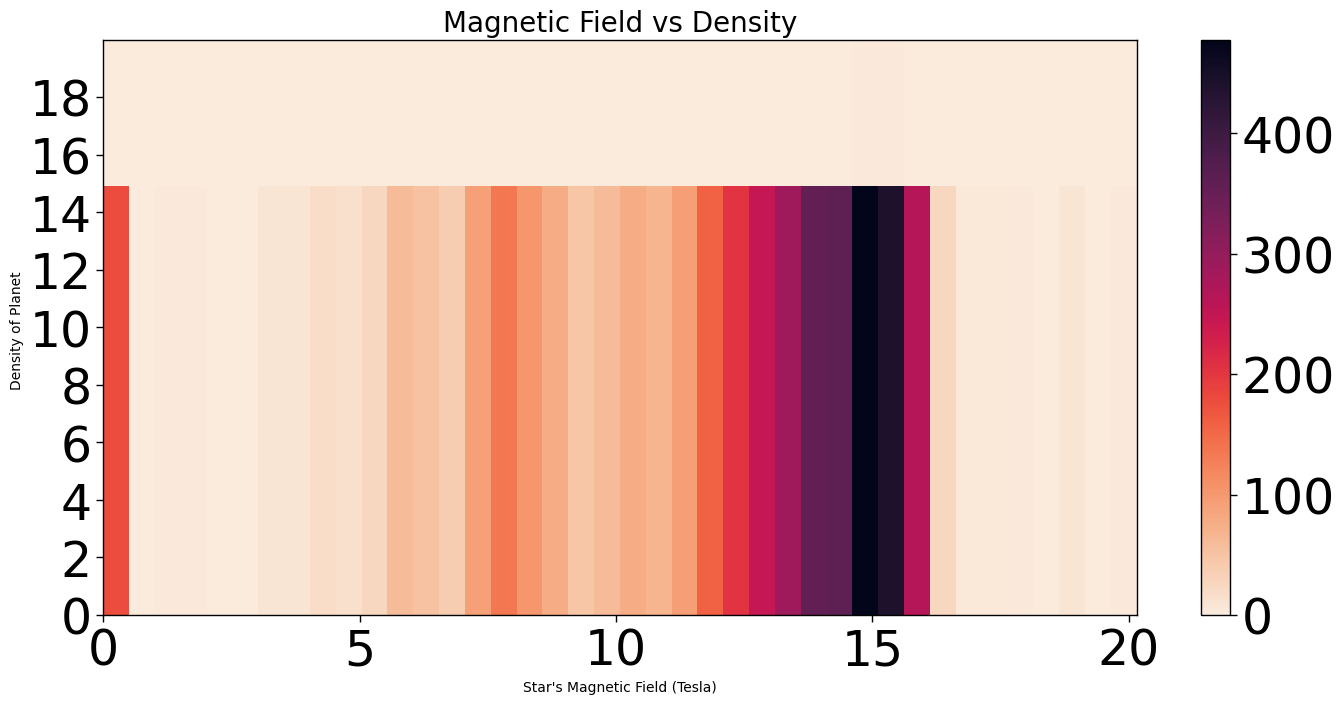

In [ ]:
plt.figure(figsize = (15,8), tight_layout = True)

# Plots a 2D Histogram
plt.hist2d(DataSet["S_MAG"].fillna(0), DataSet["P_DENSITY"].fillna(0), bins = 40, cmap = "rocket_r")

plt.title("Magnetic Field vs Density", fontsize = 20)

# X and Y Labels
plt.xlabel("Star's Magnetic Field (Tesla)", fontsize = 10)
plt.ylabel("Density of Planet ", fontsize = 10)

plt.yticks(np.arange(0,20,2))
plt.ylim(0,20)

plt.colorbar()

# Exports as PDF
plt.savefig("StarMagneticField_VS_Density_Plot.pdf")

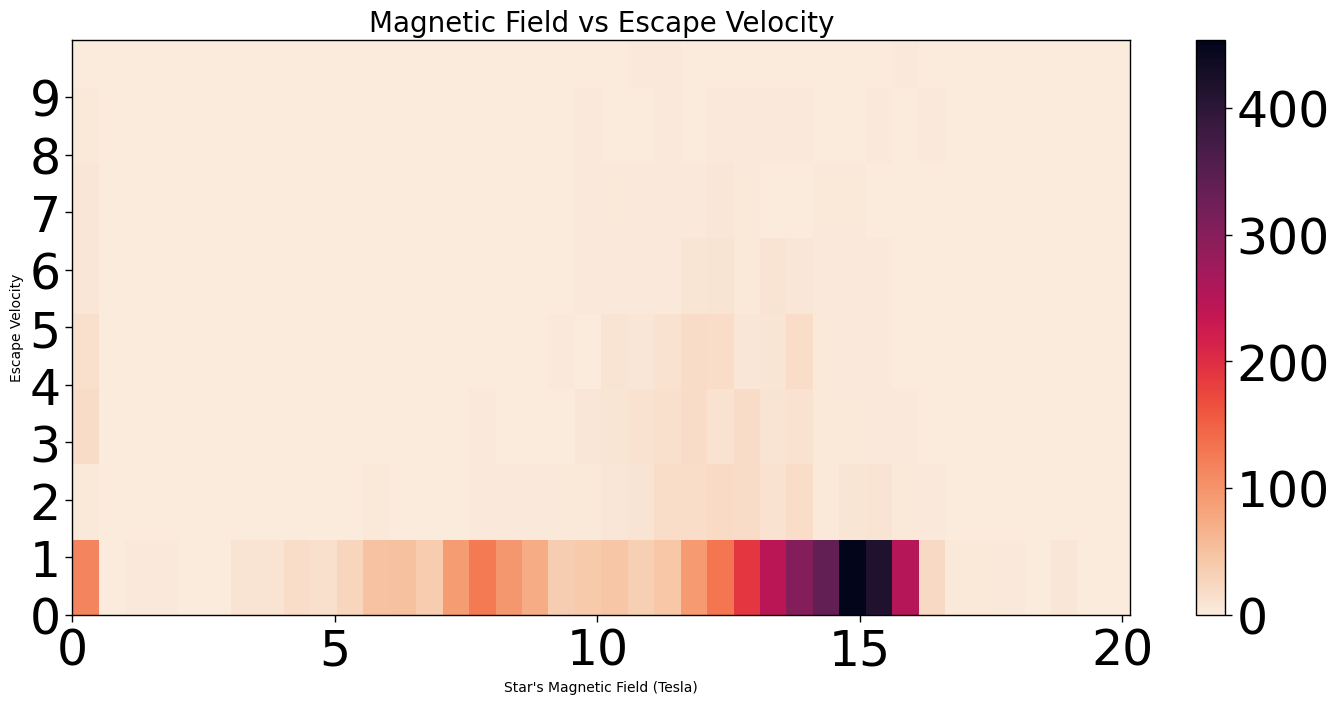

In [ ]:
plt.figure(figsize = (15,8), tight_layout = True)

# Plots a 2D Histogram
plt.hist2d(DataSet["S_MAG"].fillna(0), DataSet["P_ESCAPE"].fillna(0), bins = 40, cmap = "rocket_r")

plt.title("Magnetic Field vs Escape Velocity", fontsize = 20)

# X and Y Labels
plt.xlabel("Star's Magnetic Field (Tesla)", fontsize = 10)
plt.ylabel("Escape Velocity", fontsize = 10)

plt.yticks(np.arange(0,10,1))
plt.ylim(0, 10)

plt.colorbar()

# Exports as PDF
plt.savefig("StarMagneticField_VS_EscapeVelocity.pdf")

## 2.4 Spectral Styles

### 2.4.1 Correlation between spectral types and hability

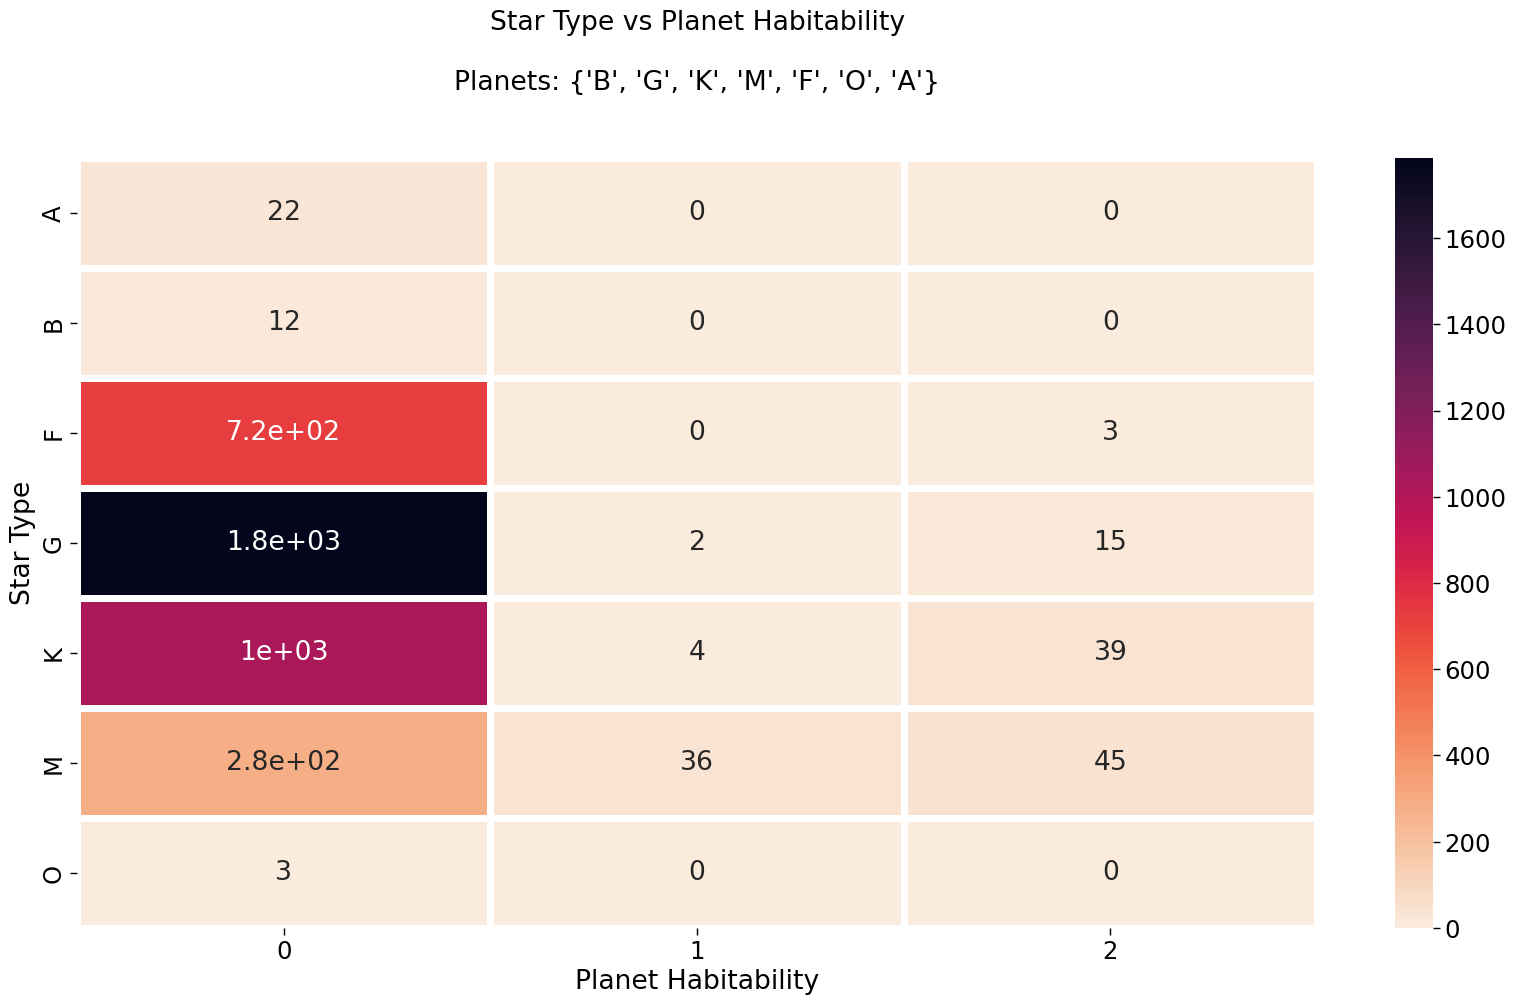

In [ ]:
# Creating a set to store star types
type_temp = set()
for i in DataSet['S_TYPE_TEMP']:
  # Eliminating any 'nan' values
  if i in ['A', 'B', 'F', 'G', 'K', 'M', 'O']:
    type_temp.add(i)

# Styling the plot
sns.set_context('paper', font_scale=2.0)

# Creating a column 'CNT' and equating it to indexes in 'P_HABITABLE'
DataSet['CNT'] = DataSet['P_HABITABLE'] + 1

# Extract required data columns
req_data = DataSet[['S_TYPE_TEMP', 'P_HABITABLE', 'CNT']]

# Creating a pivot table
pivoted_req_data = pd.pivot_table(req_data, index = 'S_TYPE_TEMP', columns = 'P_HABITABLE', values = 'CNT', aggfunc="sum").fillna(0)

# Adjusting plot attributes
plt.figure(figsize = (20, 10))
sns.heatmap(pivoted_req_data, cmap='rocket_r', linewidths = 5.0, annot=True)

# Labelling the axes
plt.xlabel("Planet Habitability")
plt.ylabel("Star Type")

# Title of the Plot
plt.title(f'Star Type vs Planet Habitability\n\nPlanets: {type_temp}\n\n')

# Exports as pdf
plt.savefig("StarType_VS_PlanetHabitability_Plot.pdf")

### 2.4.3


'plt.hist(DataSet[\'P_RADIUS\'], DataSet[\'S_TYPE_TEMP\'], edgecolor="black")\nplt.show()'

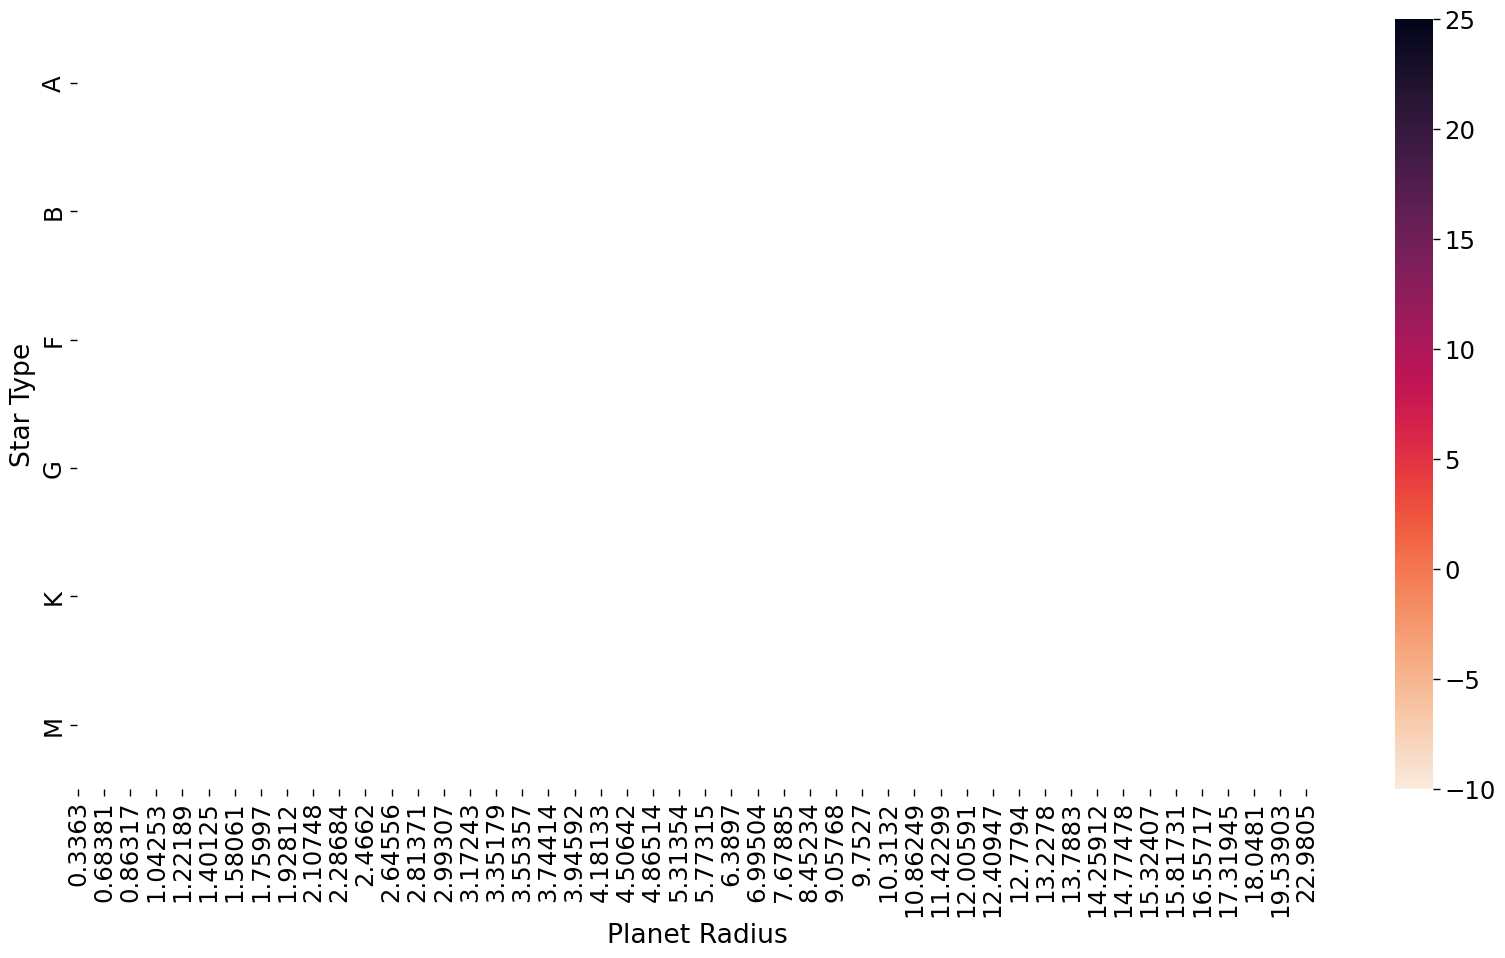

In [ ]:
# 2.4.3

# Styling the plot
sns.set_context('paper', font_scale=2.0)

#
DataSet['CNT'] = 1

# Extract required data columns
req_data = DataSet[['P_RADIUS', 'S_TYPE_TEMP', 'CNT']]

# Sorting the radius values
req_data.sort_values(by=['P_RADIUS'])

# Creating a pivot table
pivoted_req_data = pd.pivot_table(req_data, index = 'S_TYPE_TEMP', columns = 'P_RADIUS', values = 'CNT')

# Adjusting plot attributes
plt.figure(figsize = (20, 10))
sns.heatmap(pivoted_req_data, vmin = -10, vmax = 25, cmap='rocket_r', linewidths = 5.0,annot=True)

# Labelling the axes
plt.xlabel("Planet Radius")
plt.ylabel("Star Type")

Text(208.91666666666669, 0.5, 'Star Type')

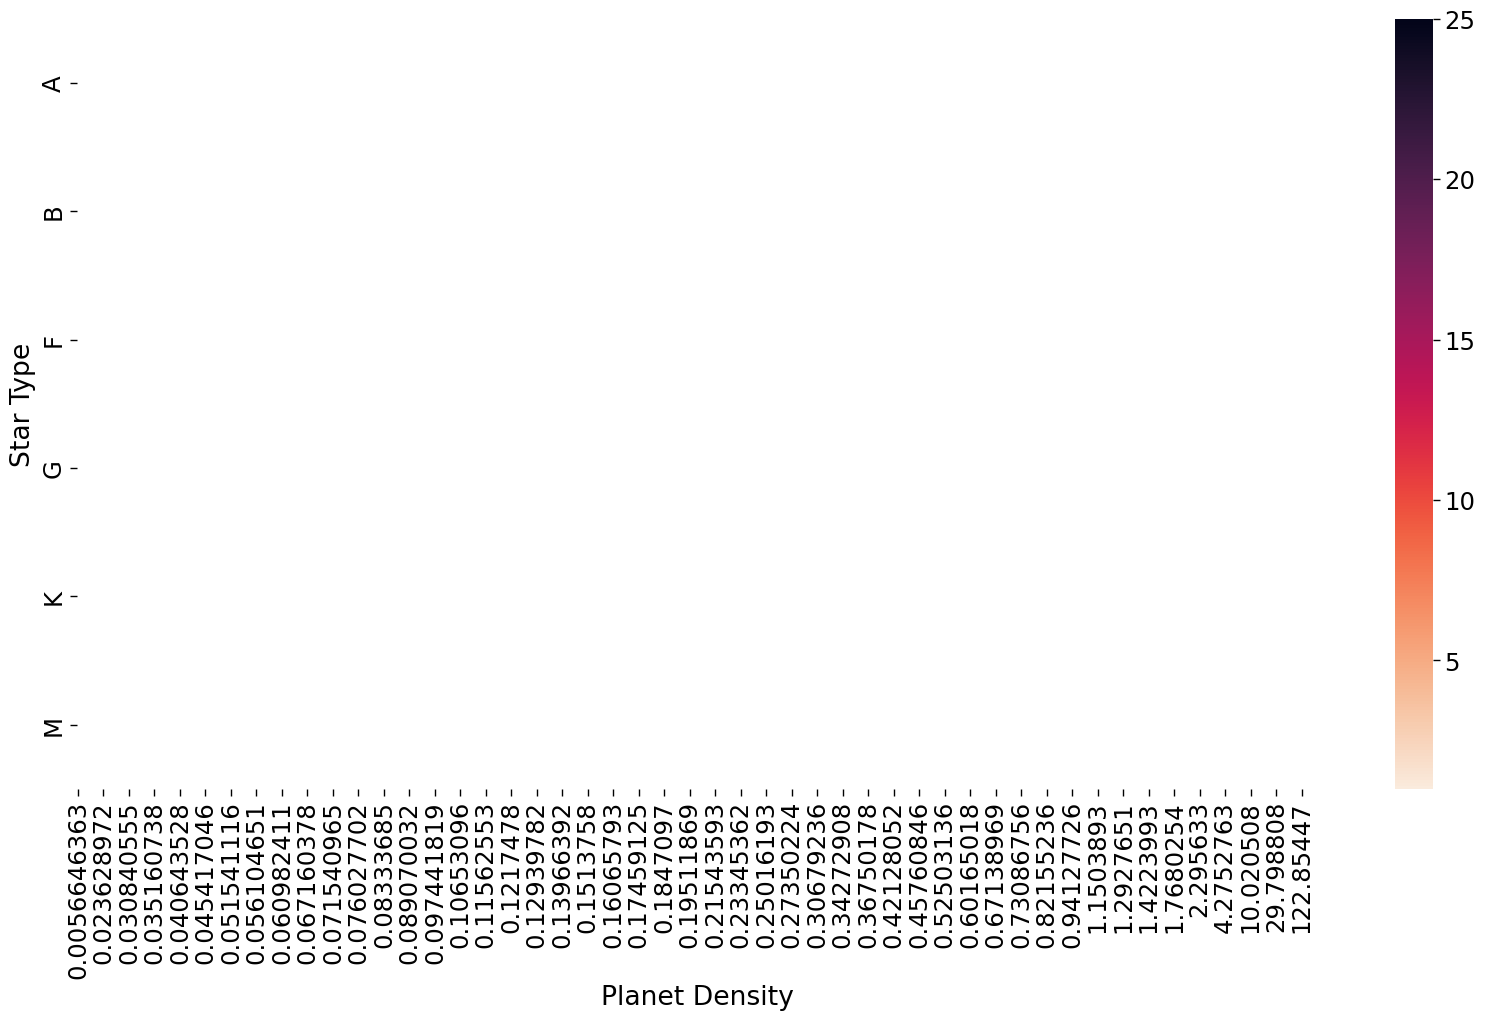

In [ ]:
# Styling the plot
sns.set_context('paper', font_scale=2.0)

#
DataSet['CNT'] = 1

# Extract required data columns
req_data = DataSet[['P_DENSITY', 'S_TYPE_TEMP', 'CNT']]

# Creating a pivot table
pivoted_req_data = pd.pivot_table(req_data, index = 'S_TYPE_TEMP', columns = 'P_DENSITY', values = 'CNT', aggfunc="sum")

# Adjusting plot attributes
plt.figure(figsize = (20, 10))
sns.heatmap(pivoted_req_data, vmax = 25,cmap='rocket_r', linewidths = 5.0)

# Labelling the axes
plt.xlabel("Planet Density")
plt.ylabel("Star Type")

# 3. Feature Engineering

## 3.1 Finding the percentage of null values

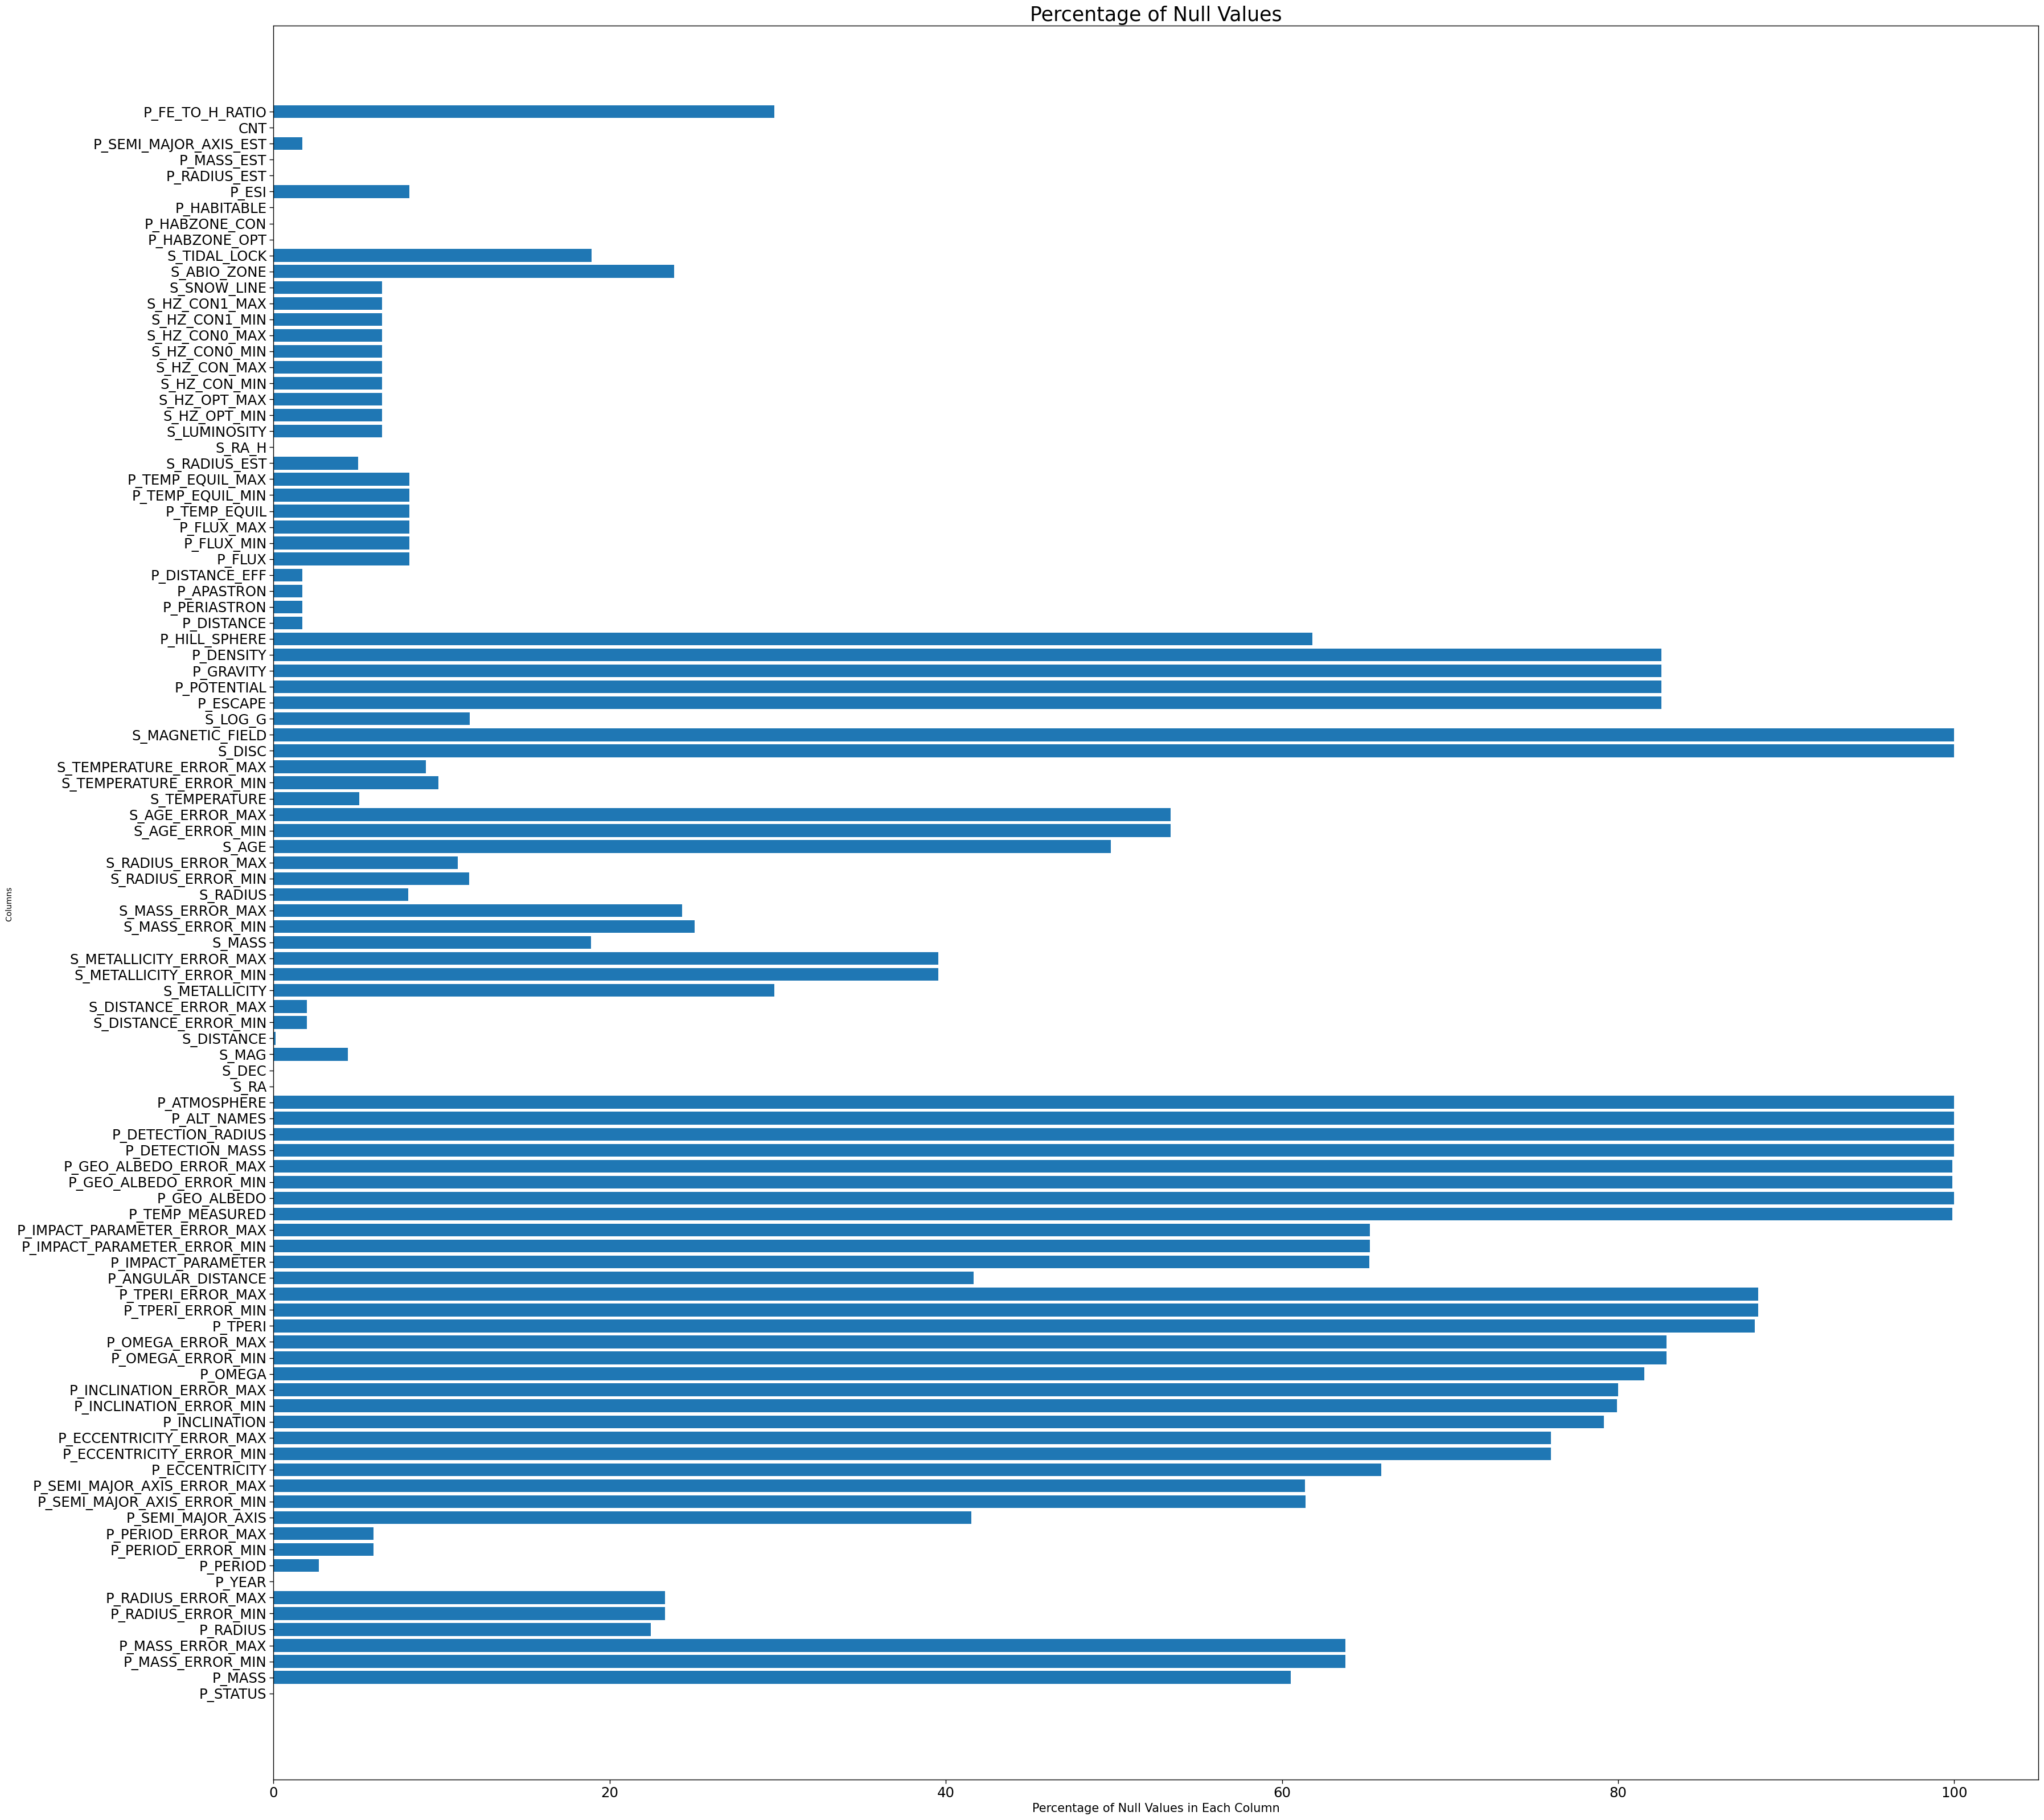

In [ ]:
# Fetching the numeric columns in DataSet as list
NumericColumns = DataSet.select_dtypes(include=np.number).columns.tolist()

# Dictionary for storing NULL_VALUE_PERCENTAGE of each column in the format (COLUMN_NAME)(str) : (NULL_VALUE_PERCENTAGE)(float)
NullRowsDict = {}

# Logic for finding NULL_VALUE_PERCENTAGE iteratively
for NumericColumn in NumericColumns:

  # Initialization of Variables
  NullRowsCount = 0

  # Fetches data available in each row in respective column
  for Data in DataSet[NumericColumn]:

    # We are checking whether the given data is NAN(Not Any Number)
    if math.isnan(Data):

      # If data is nan then we are incrementing NullRowsCount
      NullRowsCount += 1

  # NULL_VALUE_PERCENTAGE = ((Rows Which are Null)/(Total Number of Rows)) * 100
  NullRowsDict[NumericColumn] = (NullRowsCount/DataSet.shape[0]) * 100

# Defines the figure size (in this case figure is image)
plt.figure(figsize=(40,40))

# Keys and values as list
Values = list(NullRowsDict.values())
Keys = list(NullRowsDict.keys())

# Plots the Bar Graph of Null Value Percentage of Each Column (Horizontally)
plt.barh(Keys, Values)

# Title
plt.title("Percentage of Null Values", fontsize=25)

# Y-Axis Label
plt.xlabel("Percentage of Null Values in Each Column", fontsize=15)

# X-Axis Label
plt.ylabel("Columns ", fontsize=10)

# Saves the plot in NullValuesPercentagePlot.png
plt.savefig("NullValuesPercentagePlot.pdf")

## 3.2 Feature Reduction

### Basically All error max and error min columns can be converted into single column by minimal data loss

### P_PERIOD
* This can be easily found by the formula for Time Period and Therefore is redundant

### P_IMPACT_PARAMETER
* This can be easily found by the formula cos(Inclination)/StellarRadius



In [ ]:
# Function used to reduce Error Columns Alone
def ReduceErrorColumn(ColumnName1: str, ColumnName2: str):

  Array = []

  # Logic to Get the Absolute Maximum of Errors in Each of these Columns
  for i in range(0, DataSet.shape[0]):

    if not math.isnan(DataSet[ColumnName1][i]) and not math.isnan(DataSet[ColumnName2][i]):

      MaxError = max(abs(DataSet[ColumnName1][i]),abs(DataSet[ColumnName2][i]))

    # If Either of them is NAN, then Absolute Value of Other will be the Greatest Possible Error
    elif math.isnan(DataSet[ColumnName1][i]) and not math.isnan(DataSet[ColumnName2][i]):
      MaxError = abs(DataSet[ColumnName2][i])
      Array.append(MaxError)

    elif math.isnan(DataSet[ColumnName2][i]) and not math.isnan(DataSet[ColumnName1][i]):

      MaxError = abs(DataSet[ColumnName1][i])
      Array.append(MaxError)

    # If both are NAN, then we fill this also with NAN
    else:
      Array.append(np.nan)

  # Converts This Array into Pandas Dataframe for Converting it into CSV file
  ReducedDataFrame = pd.DataFrame(Array)

  return ReducedDataFrame

# Catching Half Empty Columns and Removing Insignificant Ones
HalfEmptyColumns = []

# Determining Significant Columns in those HalfEmptyColumns
SignificantButHalfEmptyColumns = ["P_MASS"]

# Appending Columns that have more than 50% of NULL values
for Column in DataSet:

  if DataSet[Column].isnull().mean() >= 0.5:

    HalfEmptyColumns.append(Column)

# Removing Significant Columns if Any have more than 50% of null Values from thhe HalfEmptyColumns List
for Elements in SignificantButHalfEmptyColumns:

  HalfEmptyColumns.remove(Elements)

# Getting Error Column Names
RedundantErrorColumnNames = []

# Finding Column Names Ending With ERROR_MAX or ERROR_MIN, because they are ones that are redundant
for Column in DataSet:
  if(Column[-9:] == "ERROR_MAX" or Column[-9:] == "ERROR_MIN"):
    RedundantErrorColumnNames.append(Column)

# Removing Dependent Columns and Useless Columns
DependentColumns = ["P_DENSITY", "P_GRAVITY", "P_IMPACT_PARAMETER", "P_TEMP_EQUIL", "P_PERIOD", "P_FLUX"]
UselessColumns = ["S_ALT_NAMES", "S_CONSTELLATION", "S_CONSTELLATION_ABR", "S_CONSTELLATION_ENG", "P_YEAR", "P_UPDATED"]

# Columns to Remove
ColumnsToRemove = DependentColumns + UselessColumns + RedundantErrorColumnNames + HalfEmptyColumns

# Copying the reduced dataset into Another DataSet
ModifiedDataSet = DataSet.copy().drop(columns = ColumnsToRemove)

# Logic for iteratively removing the Redundant Error Columns
for i in range(0, len(RedundantErrorColumnNames), 2):

  Reduced = ReduceErrorColumn(RedundantErrorColumnNames[i], RedundantErrorColumnNames[i+1])
  ModifiedDataSet[RedundantErrorColumnNames[i][:-4] + "_MAX"]  = Reduced

# Writes the ModifiedDataSet to FeatureReduced_ExoplanetCatalog.csv
ModifiedDataSet.to_csv("FeatureReduced_ExoplanetCatalog.csv")



## 3.3 Imputation

Choose KNN Imputer, because it averages all the planets similar to its characteristics and gives us the value.

In [ ]:
# Gets the already implemented K-Nearest Neighbours Imputer from Scikit-Learn Library
# We are using K = 4
from sklearn.impute import KNNImputer
Imputer = KNNImputer(n_neighbors=4)

# Gets names of numeric columns as list
NumericColumns = DataSet.select_dtypes(include = np.number).columns.tolist()

# Algorithm Writes the values to missing columns in the DataSet
DataSet_Imputed = pd.DataFrame(Imputer.fit_transform(DataSet[NumericColumns]))

# Writes DataSet_Imputed to Imputed_Exoplanet_2019.csv file
DataSet_Imputed.to_csv("Imputed_ExoPlanet_2019.csv")

#4. Habitability Classification
## 4.1
Build a robust and efficient classifier for classifying a new exoplanet into the three classes of habitability namely,\
i) Uninhabitable planets (0)\
ii) Conservatively habitable planets (1)\
iii) Optimistically habitable planets (2)\
by utilizing the target features.\
Implement K-Fold Cross Validation for training. \
Train the dataset
for all values of K from 2-10. Plot the loss and accuracy versus
epochs for these K values.

In [ ]:
# Take copy for working
DataSet_31 = DataSet[DataSet.select_dtypes(include = np.number).columns.tolist()].fillna(0)

# Drop derived fields, that are unnecessary for training
DataSet_31 = DataSet_31.drop(['P_MASS_ERROR_MAX', 'P_RADIUS_ERROR_MAX', 'P_PERIOD_ERROR_MAX', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MAX', 'P_INCLINATION_ERROR_MAX', 'P_OMEGA_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_GEO_ALBEDO_ERROR_MAX', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY_ERROR_MAX', 'S_MASS_ERROR_MAX', 'S_RADIUS_ERROR_MAX', 'S_AGE_ERROR_MAX', 'S_TEMPERATURE_ERROR_MAX'], axis=1)

In [ ]:
# Split train data and target data
TrainDataSet = DataSet_31
TrainLabels = np.array(TrainDataSet.pop('P_HABITABLE'))
TrainFeatures = np.array(TrainDataSet)

# Data normalization - limit values for all columns between -5 and 5
scaler = StandardScaler()
TrainFeatures = scaler.fit_transform(TrainFeatures)
TrainFeatures = np.clip(TrainFeatures, -1, 1)

In [ ]:
# Define a function to provide Decision Tree model
def model(depth):
    return tree.DecisionTreeClassifier(random_state= 42, max_depth= depth)

# Function to train using kfold cross validation
def kfold_train(train_features, train_labels, model):
    X = TrainFeatures
    y = TrainLabels

    # Return arrays to store result
    accuracy_scores = []
    k_splits = []

    # Run KFold for values from 2 to 10
    for i in range(2, 11):
        # Run the model
        # Get model scores
        kf = StratifiedKFold(n_splits=i, shuffle=True, random_state=42)

        score = cross_val_score(model, X, y, cv=kf, scoring="accuracy")

        # Store accuracy scores
        accuracy_scores.append(score.mean())

        k_splits.append(i)

    return [k_splits, accuracy_scores]

# Utility to train different models
def fine_tune_decision_tree():
    res = []

    for depth in range(1, 11):
        # Create a Decision tree model with given depth
        tmodel = model(depth)

        # Train and get accuracy scores for the above model
        k_splits, accuracy_scores = kfold_train(TrainFeatures, TrainLabels, tmodel)

        # Store the results
        res.append([depth, k_splits, accuracy_scores])

    return res

# Start training for all combinations of decision trees and KFold splits
res = fine_tune_decision_tree()

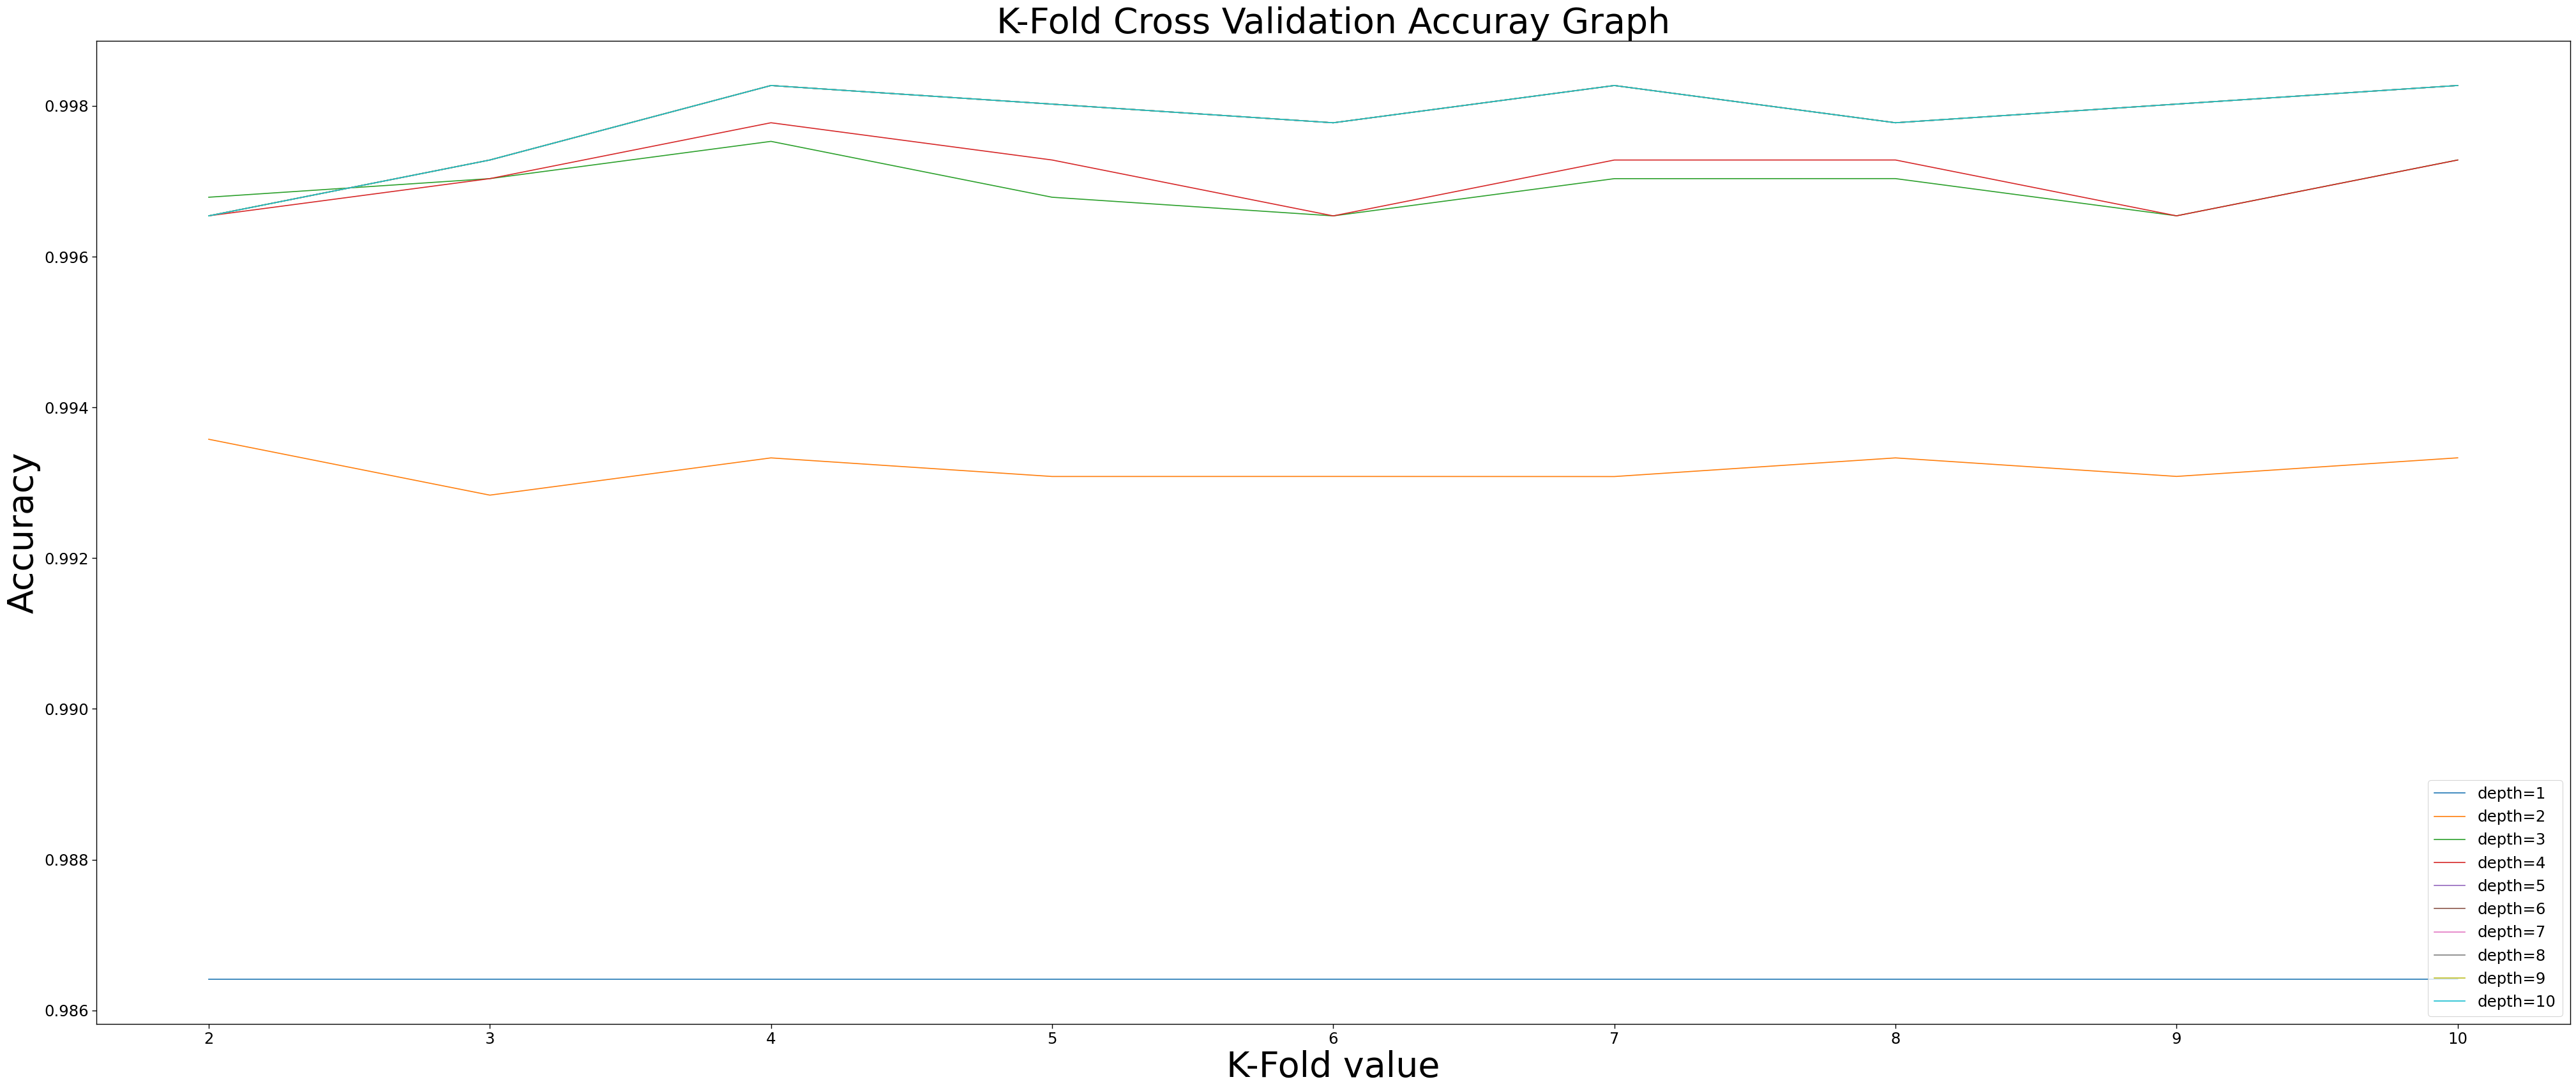

In [ ]:
  # For each score obtained from training, plot the results in a line chart
  LineColors = ['black', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

  plt.figure(figsize=(50,20))

  for row in res:
      plt.plot(row[1], row[2], color=LineColors[row[0]], label=f'depth={row[0]}')

  plt.legend(loc = "lower right")

  plt.title("K-Fold Cross Validation Accuray Graph", fontsize = 40)

  plt.xlabel('K-Fold value', fontsize = 40)
  plt.ylabel('Accuracy', fontsize = 40)

  plt.savefig("KFold_Accuracy_Plot.pdf")


